In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

In [21]:
# 데이터 불러오기
iris = load_iris()
# 데이터프레임 - 학습하는 데이터
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# 학습하는 데이터의 정답값
labels = pd.DataFrame(iris.target)

In [22]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
labels.columns=['target']
labels

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [25]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [26]:
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### dbscan

In [27]:
model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(data))
predict.columns=['predict']

In [28]:
predict

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [29]:
r = pd.concat([data,predict], axis=1)
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


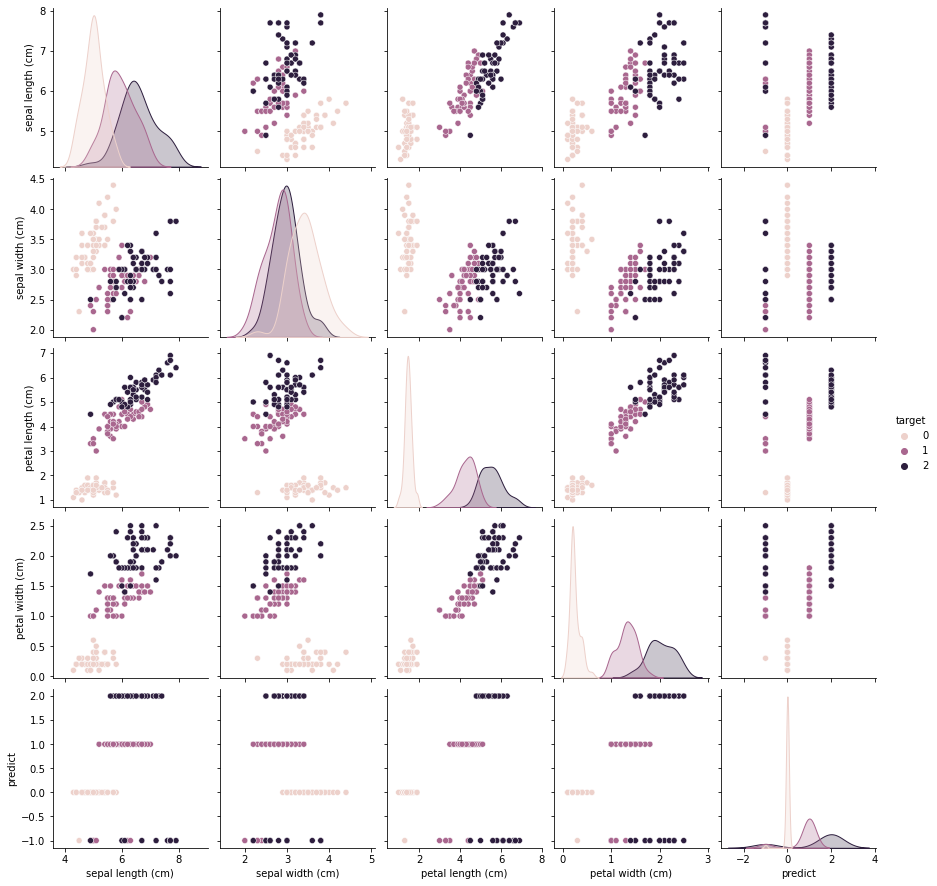

In [32]:
# 예측값 기준
sns.pairplot(r, hue='target')

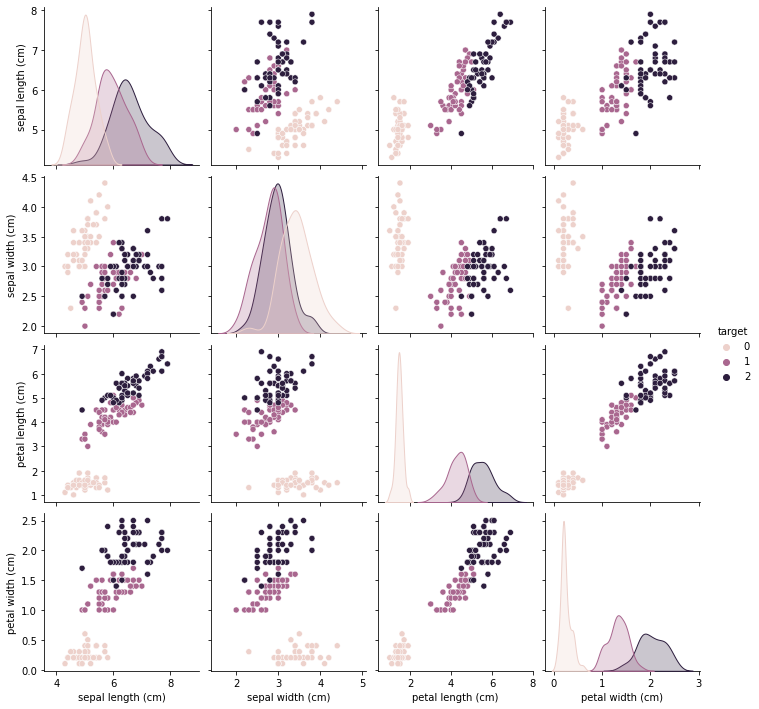

In [31]:
# 데이터 기준
sns.pairplot(data, hue='target')

In [33]:
from sklearn.cluster import KMeans

In [45]:
# 데이터 불러오기
iris = load_iris()
# 데이터프레임 - 학습하는 데이터
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# 학습하는 데이터의 정답값
labels = pd.DataFrame(iris.target)

In [46]:
labels.columns=['target']

In [47]:
data = pd.concat([data, labels], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
km = KMeans(n_clusters=3, random_state=21)
km.fit(data)

KMeans(n_clusters=3, random_state=21)

In [49]:
pred = pd.DataFrame(km.labels_)
pred.columns=['predict']

In [50]:
r2 = pd.concat([data, pred], axis=1)

In [51]:
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   predict            150 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 6.0 KB


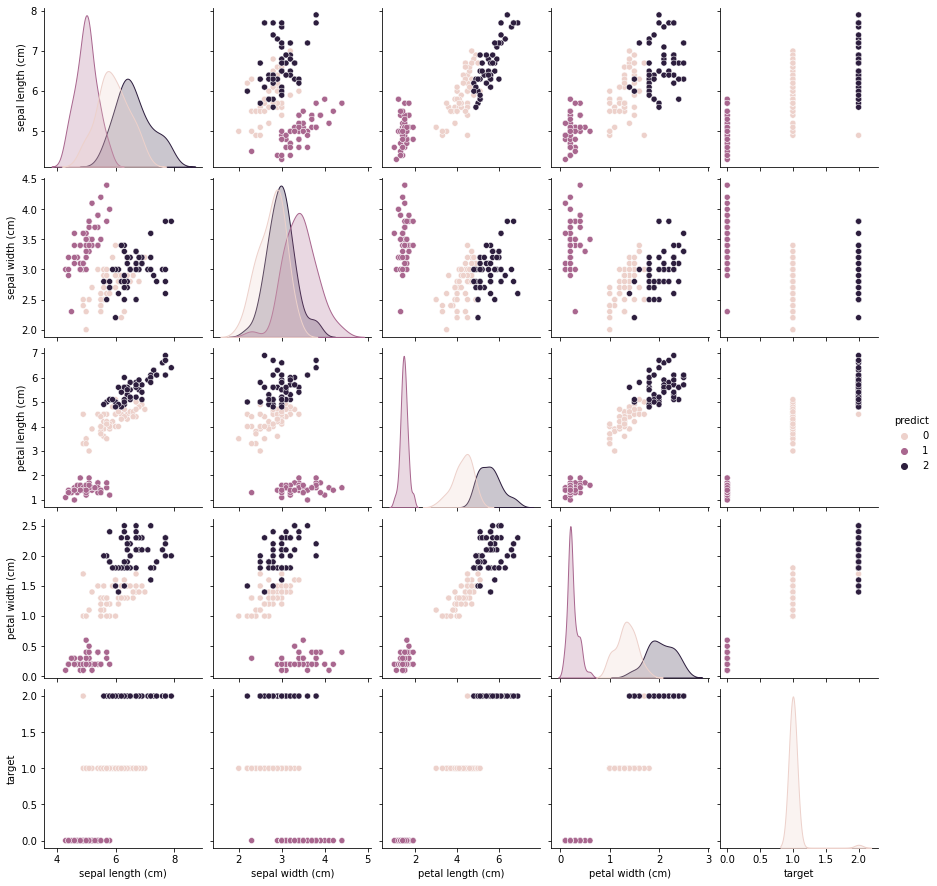

In [52]:
sns.pairplot(r2, hue='predict')
plt.show()

- 아이리스 데이터에서 결과가 K-Means가 더 좋아보이지만 모든 데이터에서 K-Means가 군집분석을 잘한다는 의미는 아님
- 머신러닝에서 무조건적으로 좋다고 말할 수 있는 모델은 없다. -> 각각 다른 데이터들에 대해서 그 데이터를 분석하고 어떤 알고리즘이 사용하기에 적합한지 판단해야함
- 데이터 특성에 맞는 모델을 사용해야함